In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the data

In [60]:
df = pd.read_csv('final.csv', index_col=0)
df.head()

,Date__(UT)__HR:MN,DEC__(ICRF),APmag,S-brt,Illu%,hEcl-Lon,hEcl-Lat,r,rdot,delta,...,open_EVRG,open_GNRC,open_IP,open_PKI,open_TMO,open_TT,open_WEC,open_WHR,open_WRK,open_ZION
0,2020-06-29 09:30:00,-213619.4,-2.722,5.385,99.92522,290.7919,-0.2326,5.161446,-0.632042,4.176970,...,57.540,111.730,35.350,119.370,541.10999,185.6525,87.50,130.37000,29.690,39.060
1,2020-06-29 10:30:00,-213622.9,-2.722,5.385,99.92563,290.7954,-0.2326,5.161431,-0.631913,4.176776,...,57.890,113.350,35.740,120.635,547.59003,187.5800,87.87,131.88000,30.100,39.660
2,2020-06-29 11:30:00,-213626.3,-2.722,5.384,99.92603,290.7989,-0.2327,5.161415,-0.631792,4.176583,...,58.385,117.060,36.095,122.425,550.74500,189.3450,88.75,134.13000,30.435,42.150
3,2020-06-29 12:30:00,-213629.8,-2.722,5.384,99.92643,290.8024,-0.2328,5.161400,-0.631680,4.176390,...,57.790,114.045,35.825,120.510,545.26001,187.5500,87.95,132.35001,30.270,40.720
4,2020-06-29 13:30:00,-213633.3,-2.722,5.384,99.92683,290.8059,-0.2329,5.161385,-0.631580,4.176198,...,58.760,116.190,36.200,122.600,553.21002,189.2000,88.87,133.91000,30.500,37.688


In [61]:
# remove index
df["Date__(UT)__HR:MN"] = pd.to_datetime(df["Date__(UT)__HR:MN"])
df["millis"] = df["Date__(UT)__HR:MN"].astype(np.int64) // 10**6
df.drop("Date__(UT)__HR:MN", axis=1, inplace=True)
df.head()

,DEC__(ICRF),APmag,S-brt,Illu%,hEcl-Lon,hEcl-Lat,r,rdot,delta,deldot,...,open_GNRC,open_IP,open_PKI,open_TMO,open_TT,open_WEC,open_WHR,open_WRK,open_ZION,millis
0,-213619.4,-2.722,5.385,99.92522,290.7919,-0.2326,5.161446,-0.632042,4.176970,-8.065790,...,111.730,35.350,119.370,541.10999,185.6525,87.50,130.37000,29.690,39.060,1593423000000
1,-213622.9,-2.722,5.385,99.92563,290.7954,-0.2326,5.161431,-0.631913,4.176776,-8.045323,...,113.350,35.740,120.635,547.59003,187.5800,87.87,131.88000,30.100,39.660,1593426600000
2,-213626.3,-2.722,5.384,99.92603,290.7989,-0.2327,5.161415,-0.631792,4.176583,-8.024857,...,117.060,36.095,122.425,550.74500,189.3450,88.75,134.13000,30.435,42.150,1593430200000
3,-213629.8,-2.722,5.384,99.92643,290.8024,-0.2328,5.161400,-0.631680,4.176390,-8.004397,...,114.045,35.825,120.510,545.26001,187.5500,87.95,132.35001,30.270,40.720,1593433800000
4,-213633.3,-2.722,5.384,99.92683,290.8059,-0.2329,5.161385,-0.631580,4.176198,-7.983943,...,116.190,36.200,122.600,553.21002,189.2000,88.87,133.91000,30.500,37.688,1593437400000


In [62]:
time = df["millis"]
df.drop("millis", axis=1, inplace=True)
df.head()
df.drop(["year", "month", "day","time", "date", "datetime"], axis=1, inplace=True)

In [63]:
dummies = pd.get_dummies(df["weekday"], prefix="weekday")
df = pd.concat([df, dummies], axis=1)
df.drop("weekday", axis=1, inplace=True)

In [64]:
df.head()

,DEC__(ICRF),APmag,S-brt,Illu%,hEcl-Lon,hEcl-Lat,r,rdot,delta,deldot,...,open_TT,open_WEC,open_WHR,open_WRK,open_ZION,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4
0,-213619.4,-2.722,5.385,99.92522,290.7919,-0.2326,5.161446,-0.632042,4.176970,-8.065790,...,185.6525,87.50,130.37000,29.690,39.060,1,0,0,0,0
1,-213622.9,-2.722,5.385,99.92563,290.7954,-0.2326,5.161431,-0.631913,4.176776,-8.045323,...,187.5800,87.87,131.88000,30.100,39.660,1,0,0,0,0
2,-213626.3,-2.722,5.384,99.92603,290.7989,-0.2327,5.161415,-0.631792,4.176583,-8.024857,...,189.3450,88.75,134.13000,30.435,42.150,1,0,0,0,0
3,-213629.8,-2.722,5.384,99.92643,290.8024,-0.2328,5.161400,-0.631680,4.176390,-8.004397,...,187.5500,87.95,132.35001,30.270,40.720,1,0,0,0,0
4,-213633.3,-2.722,5.384,99.92683,290.8059,-0.2329,5.161385,-0.631580,4.176198,-7.983943,...,189.2000,88.87,133.91000,30.500,37.688,1,0,0,0,0


## Standardize the data

In [65]:
df.dtypes

DEC__(ICRF)    float64
APmag          float64
S-brt          float64
Illu%          float64
hEcl-Lon       float64
                ...   
weekday_0        uint8
weekday_1        uint8
weekday_2        uint8
weekday_3        uint8
weekday_4        uint8
Length: 152, dtype: object

In [66]:
from sklearn.preprocessing import StandardScaler
import torch
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_tensor = torch.Tensor(scaled_df)


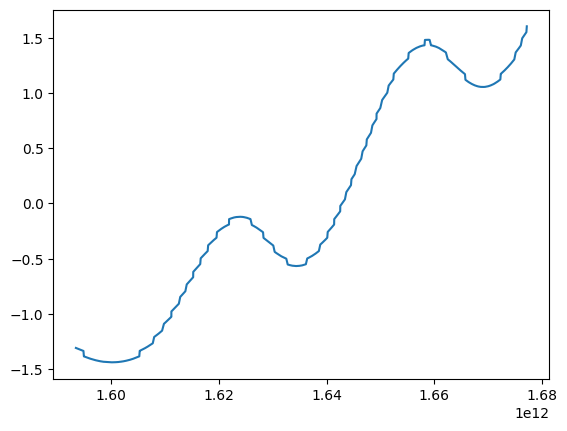

In [67]:
plt.plot(time, scaled_tensor[:, 0])

In [68]:
unscaled = scaler.inverse_transform(scaled_df) # Checking if our scaling worked

In [69]:
np.mean((df - unscaled)**2)

C:\Users\alexg\anaconda3\envs\cmse381\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


DEC__(ICRF)    3.579534e-23
APmag          0.000000e+00
S-brt          0.000000e+00
Illu%          0.000000e+00
hEcl-Lon       5.326679e-29
                   ...     
weekday_0      0.000000e+00
weekday_1      6.102070e-34
weekday_2      6.102070e-34
weekday_3      0.000000e+00
weekday_4      0.000000e+00
Length: 152, dtype: float64

In [70]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.to_csv("scaled.csv")
pd.to_pickle(scaled_df, "scaled.pkl")